In [1]:
import numpy as np
from ss_problem import SSProblem, SecureStateReconstruct
from tests import generate_random_dtsystem_data, generate_random_io_data,solve_ssr_by_decomposition, remove_duplicate_states
from safe_control import LinearInequalityConstr
from scipy import linalg

n = 8
m = 3
p = 5
s = 3

seed = 100
rng = np.random.default_rng(seed=seed)

# define system
dtsys_a, dtsys_b, dtsys_c, dtsys_d = generate_random_dtsystem_data(rng,n,m,p)

# define true and fake initial states
init_state1 = rng.normal(10,2,(n,1))
init_state2 = 2*init_state1
sensor_initial_states = [init_state2 if i < s else init_state1 for i in range(p)]

# define io data
u_seq, tilde_y_his, noise_level = generate_random_io_data(dtsys_a,dtsys_b, dtsys_c, dtsys_d, s, sensor_initial_states, 
                            rng, has_u_seq = True, is_noisy = False)

# construct a problem instance and a solution instance
ss_problem = SSProblem(dtsys_a, dtsys_b, dtsys_c, dtsys_d, tilde_y_his, 
                        attack_sensor_count=s,input_sequence=u_seq,measurement_noise_level= noise_level )
# ssr_solution = SecureStateReconstruct(ss_problem,possible_comb=comb1)
ssr_solution = SecureStateReconstruct(ss_problem)

# solve for sparse observability index (soi) and eigenvalue observability index (eoi) 
soi = SecureStateReconstruct.compute_sparse_observability(ss_problem.A,ss_problem.C)
eoi = SecureStateReconstruct.compute_eigenvalue_observability(ss_problem.A,ss_problem.C)
print(f'The problem have a sparse observability index {soi}, eigenvalue observability index: {eoi}, attacked sensor count: {s}')

# solve ssr by brute-force approach
possible_states_bruteforce,corresp_sensors, _ = ssr_solution.solve_initial_state(error_bound = 1e-3)
possible_states_bruteforce = remove_duplicate_states(possible_states_bruteforce.transpose())
# solve ssr by decomposition
possible_states_decomposition = solve_ssr_by_decomposition(ssr_solution, eoi)

# printing
print('-----------------------  brute-force   approach  -------------------------------')
print( possible_states_bruteforce)
    

print('-----------------------  decomposition approach  -------------------------------')
print(possible_states_decomposition)


The problem have a sparse observability index 4, eigenvalue observability index: 4, attacked sensor count: 3
-----------------------  brute-force   approach  -------------------------------
[array([23.28260463, 25.87924829, 16.99548253, 19.47443469, 19.58136586,
       23.70463535, 16.82962885, 21.2759687 ]), array([11.64130231, 12.93962415,  8.49774127,  9.73721735,  9.79068293,
       11.85231767,  8.41481442, 10.63798435])]
-----------------------  decomposition approach  -------------------------------
[array([23.28260463, 25.87924829, 16.99548253, 19.47443469, 19.58136586,
       23.70463535, 16.82962885, 21.2759687 ]), array([11.64130231, 12.93962415,  8.49774127,  9.73721735,  9.79068293,
       11.85231767,  8.41481442, 10.63798435])]


The problem have a sparse observability index 7, eigenvalue observability index: 7, attacked sensor count: 4
The problem have a sparse observability index 8, eigenvalue observability index: 8, attacked sensor count: 4
The problem have a sparse observability index 9, eigenvalue observability index: 9, attacked sensor count: 4
The problem have a sparse observability index 10, eigenvalue observability index: 10, attacked sensor count: 4
The problem have a sparse observability index 11, eigenvalue observability index: 11, attacked sensor count: 4
The problem have a sparse observability index 12, eigenvalue observability index: 12, attacked sensor count: 4
The problem have a sparse observability index 13, eigenvalue observability index: 13, attacked sensor count: 4
The problem have a sparse observability index 13, eigenvalue observability index: 14, attacked sensor count: 4
The problem have a sparse observability index 15, eigenvalue observability index: 15, attacked sensor count: 4
The pro

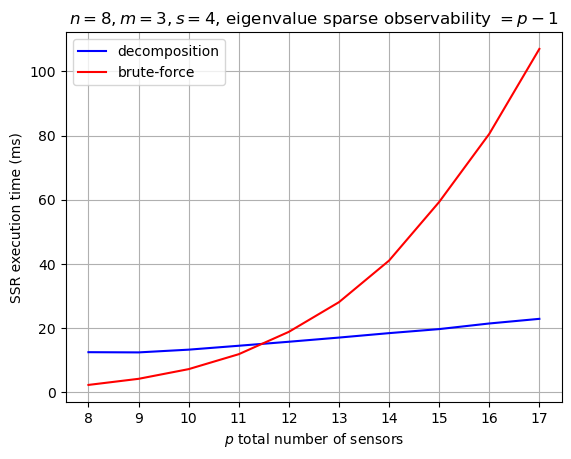

In [2]:
from tests import main_ssr,main_ssr_timing
# main_ssr()
main_ssr_timing()

In [16]:
from tests import main_secure_and_safe_control
main_secure_and_safe_control()

S&S problem has 4 states, 4 inputs, 7 sensors, 4 attacked sensors.
The problem have a sparse observability index 6, eigenvalue observability index: 6, attacked sensor count: 4

 -----------------------  brute-force   approach  -------------------------------
possible_states:[array([-2.67988935, -2.2901237 , -1.90767346, -1.21166831]), array([-0.78107349, -0.61900045,  0.69079535,  0.49808422])]
u_safe: [ 3.38307613 -4.24007994 -1.44427691  0.81511217]
||u_safe - u_nom||:4.358578788755307

 -----------------------  decomposition approach  -------------------------------
possible_states:[array([-2.67988935, -2.2901237 , -1.90767346, -1.21166831]), array([-0.78107349, -0.61900045,  0.69079535,  0.49808422])]
u_safe: [ 3.38307613 -4.24007994 -1.44427691  0.81511217]
||u_safe - u_nom||:4.358578788755305

 -----------------------  decomposition without combination -----------------------
u_safe: [ 3.48162917 -4.10354518 -1.31381796  0.77438856]
||u_safe - u_nom||:4.575448323350684

 --------

The problem have a sparse observability index 5, eigenvalue observability index: 5, attacked sensor count: 4
The problem have a sparse observability index 6, eigenvalue observability index: 6, attacked sensor count: 4
The problem have a sparse observability index 7, eigenvalue observability index: 7, attacked sensor count: 4
The problem have a sparse observability index 8, eigenvalue observability index: 8, attacked sensor count: 4
The problem have a sparse observability index 9, eigenvalue observability index: 9, attacked sensor count: 4
The problem have a sparse observability index 10, eigenvalue observability index: 10, attacked sensor count: 4
The problem have a sparse observability index 11, eigenvalue observability index: 11, attacked sensor count: 4
The problem have a sparse observability index 12, eigenvalue observability index: 12, attacked sensor count: 4
The problem have a sparse observability index 13, eigenvalue observability index: 13, attacked sensor count: 4
The problem

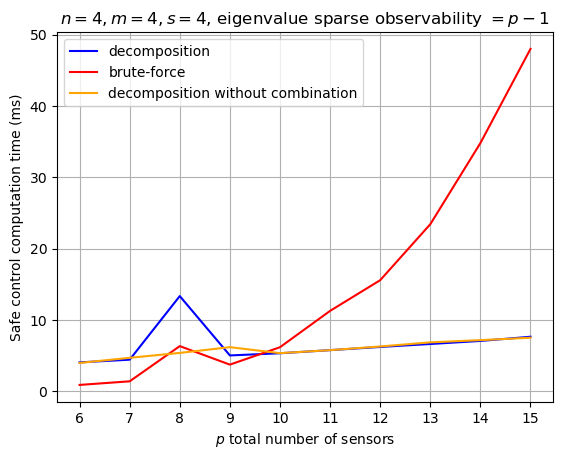

In [1]:
from tests import main_secure_and_safe_control_timing
main_secure_and_safe_control_timing(n = 4, m = 4, s = 4, p_range=range(6,16))